### Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Nhập dữ liệu

In [2]:
diabetes_df = pd.read_csv('./Dataset.csv')
print(diabetes_df.head())
print(diabetes_df.info())
print(diabetes_df.describe())

   glucose  bloodpressure  diabetes
0       40             85         0
1       40             92         0
2       45             63         1
3       45             80         0
4       40             73         1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB
None
          glucose  bloodpressure    diabetes
count  995.000000     995.000000  995.000000
mean    44.306533      79.184925    0.500503
std      6.707567       9.340204    0.500251
min     20.000000      50.000000    0.000000
25%     40.000000      72.000000    0.000000
50%     45.000000      80.000000    1.000000
75%     50.000000      87.000000    1.000000
max     70.000000     100.000000    1.000000


Text(0.5, 1.0, 'Ma trận tương quan')

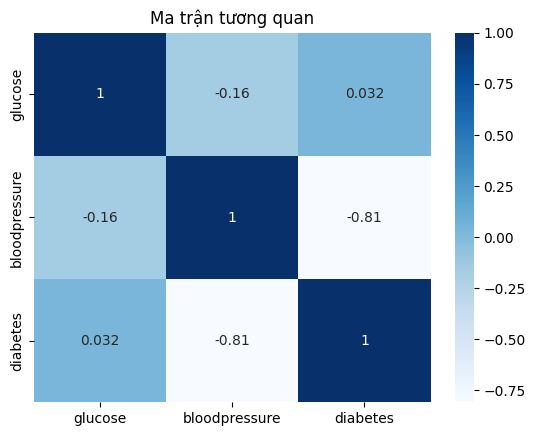

In [3]:
# Mối tương quan giữa các thuộc tính
correl_matrix = diabetes_df.corr(method='pearson')
correl_matrix

sns.heatmap(correl_matrix,annot=True,cmap='Blues');
plt.title("Ma trận tương quan")

### Xây dựng mô hình

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB

# tạo features và target
X = diabetes_df[['glucose','bloodpressure']]
y = diabetes_df['diabetes']

In [5]:
# tạo tập train và test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
#Khởi tạo model
model = GaussianNB()

In [7]:
#Huấn luyện mô hình
model.fit(X_train,y_train)
#dự đoán
y_pred = model.predict(X_test)

### Đánh giá mô hình

In [8]:
#Đánh giá mô hình
print('Accurancy:',accuracy_score(y_test,y_pred))

Accurancy: 0.9296482412060302


In [9]:
# ma trận nhầm lẫn
print('\nMa trận nhầm lẫn: \n',confusion_matrix(y_test,y_pred))


Ma trận nhầm lẫn: 
 [[86  7]
 [ 7 99]]


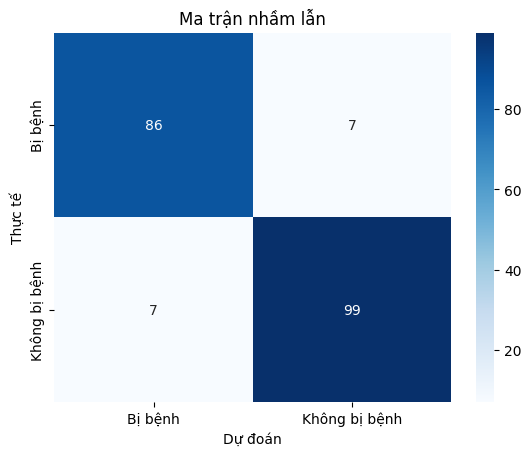

In [10]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,xticklabels=["Bị bệnh","Không bị bệnh"],yticklabels=["Bị bệnh","Không bị bệnh"],cmap="Blues")
plt.title("Ma trận nhầm lẫn")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế");

### Thử nghiệm với tập dữ liệu mẫu

In [12]:
data_sample = pd.DataFrame([[100,80],[75,57]],columns=['glucose','bloodpressure'])
sample_pred = model.predict(data_sample)
print("\n Sample Predict: ",sample_pred);
for i in sample_pred:
    if i == 0:
        print("Không bị bệnh")
    else:
        print("Bị bệnh")
print("Tỉ lệ dự đoán: ",)


 Sample Predict:  [1 1]
Bị bệnh
Bị bệnh
